In [1]:
# Load dataset
!gdown -- https://drive.google.com/uc?id=1CtpfMnFoTkTtB9ZwfUQOpwn06ZorIQIx

Downloading...
From (original): https://drive.google.com/uc?id=1CtpfMnFoTkTtB9ZwfUQOpwn06ZorIQIx
From (redirected): https://drive.google.com/uc?id=1CtpfMnFoTkTtB9ZwfUQOpwn06ZorIQIx&confirm=t&uuid=d8f8f69f-25a5-46a2-b89a-081427cd278d
To: /content/fake_audio_dataset.zip
100% 3.31G/3.31G [00:44<00:00, 74.7MB/s]


In [2]:
!unzip -qq '/content/fake_audio_dataset.zip'

In [3]:
import librosa

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pandas as pd
import random

from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

import torch
import os
import warnings
warnings.filterwarnings('ignore')
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [4]:
class Config:
    SR = 32000
    N_FFT = 2048
    HOP_LENGTH = 1024
    # Dataset
    ROOT_FOLDER = './'
    # Training
    N_CLASSES = 2
    BATCH_SIZE = 96
    N_EPOCHS = 5
    LR = 3e-4
    # Others
    SEED = 42

CONFIG = Config()

In [5]:
df = pd.read_csv('./train.csv')
train, val, _, _ = train_test_split(df, df['label'], test_size=0.2, random_state=CONFIG.SEED)

In [6]:
def get_mspc_feature(df, train_mode=True):
    features = []
    labels = []
    for _, row in tqdm(df.iterrows()):
        # librosa패키지를 사용하여 wav 파일 load
        y, sr = librosa.load(row['path'], sr=CONFIG.SR)

        # librosa패키지를 사용하여 mel-spectrogram 추출
        mspc = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=CONFIG.HOP_LENGTH, n_fft=CONFIG.N_FFT)
        melspectrogram = preprocessing.scale(mspc)

        features.append(melspectrogram)

        if train_mode:
            label = row['label']
            label_vector = np.zeros(CONFIG.N_CLASSES, dtype=float)
            label_vector[0 if label == 'fake' else 1] = 1
            labels.append(label_vector)

    if train_mode:
        return features, labels
    return features

In [ ]:
import sklearn

In [ ]:
train_mfcc, train_labels = get_mspc_feature(train, True)
val_mfcc, val_labels = get_mspc_feature(val, True)

44350it [22:20, 33.07it/s]
11088it [05:28, 33.74it/s]


In [17]:
ul_folder_path = '/content/unlabeled_data'

ul = []
ul_path = []

for filename in os.listdir(ul_folder_path):
    if filename.endswith('.ogg'):
        ul.append(os.path.basename(filename))
        ul_path.append(os.path.join(ul_folder_path, filename))

In [18]:
ul_df = pd.DataFrame({'id': ul, 'path': ul_path})

In [19]:
ul_data = get_mspc_feature(ul_df, False)

1264it [01:04, 19.48it/s]


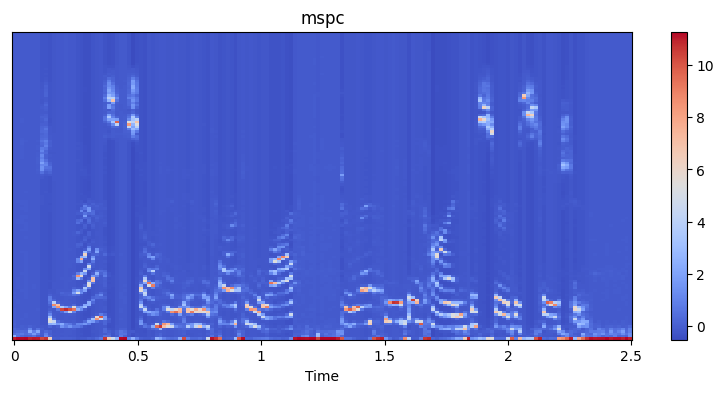

In [25]:
import matplotlib.pyplot as plt

# MFCC
index = 3
mspc = ul_data[index]


# MFCC 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(mspc, sr=CONFIG.SR, x_axis='time')
plt.colorbar()
plt.title('mspc' )
plt.show()

In [33]:
print(ul_data[0].shape)

(128, 157)


In [34]:
os.mkdir('ul_data')

In [35]:
for i in range(len(ul_data)):
  np.save(f'/content/ul_data/ul_data{i}.npy', ul_data[i])

In [36]:
!zip -r -qq ul_data.zip ul_data

In [ ]:
os.mkdir('train_mspc')
os.mkdir('train_labels')
os.mkdir('val_mspc')
os.mkdir('val_labels')

In [ ]:
for i in range(len(train_mfcc)):
    np.save(f'/content/train_mspc/train_mspc{i}.npy', train_mfcc[i])
    np.save(f'/content/train_labels/train_labels{i}.npy', train_labels[i])

In [ ]:
for i in range(len(val_mfcc)):
  np.save(f'/content/val_mspc/val_mspc{i}.npy', val_mfcc[i])
  np.save(f'/content/val_labels/val_labels{i}.npy', val_labels[i])

In [ ]:
import os

folder_path = '/content/train_mfcc'  # Replace with the actual path
num_files = len(os.listdir(folder_path))
print(f"Number of files in '{folder_path}': {num_files}")

Number of files in '/content/train_mfcc': 44350


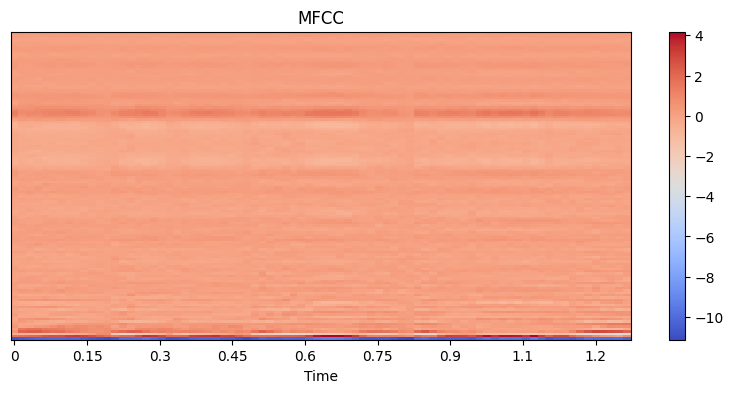

In [ ]:
import matplotlib.pyplot as plt

# MFCC
mfcc = np.load('train_mfcc.npy')

# MFCC 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=CONFIG.SR, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

In [ ]:
test = pd.read_csv('./test.csv')
test_mfcc = get_mspc_feature(test, False)

50000it [35:58, 23.17it/s]


In [ ]:
os.mkdir('test_mspc')

In [ ]:
for i in range(len(test_mfcc)):
  np.save(f'/content/test_mspc/test_mspc{i}.npy', test_mfcc[i])

In [ ]:
!zip -r -qq train_labels.zip train_labels
!zip -r -qq train_spec.zip train_mspc

In [ ]:
!zip -r -qq test_mspc.zip test_mspc

In [ ]:
!zip -r val_mspc.zip val_mspc

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  adding: val_mspc/val_mspc7116.npy (deflated 25%)
  adding: val_mspc/val_mspc1832.npy (deflated 27%)
  adding: val_mspc/val_mspc5461.npy (deflated 36%)
  adding: val_mspc/val_mspc5412.npy (deflated 24%)
  adding: val_mspc/val_mspc10764.npy (deflated 29%)
  adding: val_mspc/val_mspc6663.npy (deflated 27%)
  adding: val_mspc/val_mspc2668.npy (deflated 26%)
  adding: val_mspc/val_mspc3881.npy (deflated 25%)
  adding: val_mspc/val_mspc9474.npy (deflated 27%)
  adding: val_mspc/val_mspc5854.npy (deflated 25%)
  adding: val_mspc/val_mspc10152.npy (deflated 29%)
  adding: val_mspc/val_mspc8322.npy (deflated 25%)
  adding: val_mspc/val_mspc7035.npy (deflated 24%)
  adding: val_mspc/val_mspc7171.npy (deflated 27%)
  adding: val_mspc/val_mspc7497.npy (deflated 27%)
  adding: val_mspc/val_mspc3491.npy (deflated 29%)
  adding: val_mspc/val_mspc130.npy (deflated 24%)
  adding: val_mspc/val_mspc5361.npy (deflated 27%)
  adding: val_mspc/val_mspc6048.npy (deflated

In [ ]:
!zip -r -qq val_labels.zip val_labels